# Activity 3.01

In [1]:
# import required packages from Keras
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import required packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
import matplotlib.patches as mpatches
# import the function for plotting decision boundary
from utils import plot_decision_boundary

Using TensorFlow backend.


In [2]:
# define a seed for random number generator so the result will be reproducible
seed = 1

In [4]:
# load the dataset, print the shapes of input and output and the number of examples
feats = pd.read_csv('data/outlier_feats.csv')
target = pd.read_csv('data/outlier_target.csv')
print("X size = ", feats.shape)
print("Y size = ", target.shape)
print("Number of examples = ", feats.shape[0])

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=seed)

X size =  (3359, 2)
Y size =  (3359, 1)
Number of examples =  3359


Plot the features and target

Text(0, 0.5, 'Feature 2')

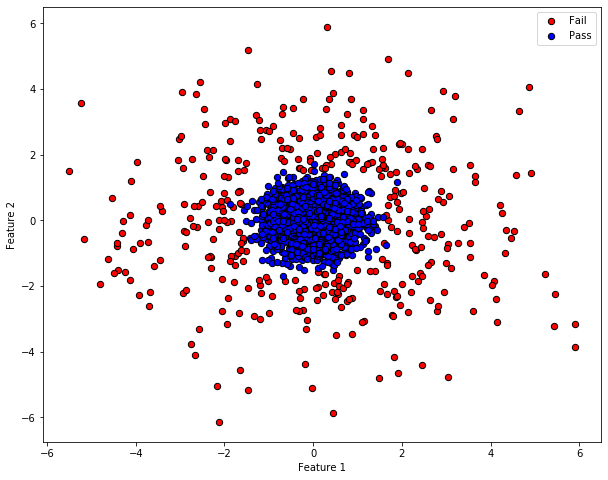

In [5]:
# changing the size of the plots
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

class_1=plt.scatter(feats.loc[target['Class']==0,'feature1'], feats.loc[target['Class']==0,'feature2'], c="red", s=40, edgecolor='k')
class_2=plt.scatter(feats.loc[target['Class']==1,'feature1'], feats.loc[target['Class']==1,'feature2'], c="blue", s=40, edgecolor='k')
plt.legend((class_1, class_2),('Fail','Pass'))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [6]:
# Logistic Regression model
np.random.seed(seed)
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2)) 
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 

# train the model for 100 epoches and batch size 5
model.fit(X_train, y_train, batch_size=5, epochs=100, verbose=1, validation_split=0.2)

Train on 2149 samples, validate on 538 samples
Epoch 1/100
2149/2149 [==============================] - 1s 260us/step - loss: 0.5458 - accuracy: 0.8413 - val_loss: 0.4414 - val_accuracy: 0.9015
Epoch 2/100
2149/2149 [==============================] - 0s 224us/step - loss: 0.3877 - accuracy: 0.8967 - val_loss: 0.3761 - val_accuracy: 0.8885
Epoch 3/100
2149/2149 [==============================] - 0s 215us/step - loss: 0.3540 - accuracy: 0.8939 - val_loss: 0.3586 - val_accuracy: 0.8885
Epoch 4/100
2149/2149 [==============================] - 0s 206us/step - loss: 0.3438 - accuracy: 0.8939 - val_loss: 0.3535 - val_accuracy: 0.8885
Epoch 5/100
2149/2149 [==============================] - 0s 205us/step - loss: 0.3404 - accuracy: 0.8939 - val_loss: 0.3515 - val_accuracy: 0.8885
Epoch 6/100
2149/2149 [==============================] - 0s 207us/step - loss: 0.3387 - accuracy: 0.8939 - val_loss: 0.3504 - val_accuracy: 0.8885
Epoch 7/100
2149/2149 [==============================] - 1s 233us/step 

2149/2149 [==============================] - 0s 196us/step - loss: 0.3373 - accuracy: 0.8939 - val_loss: 0.3494 - val_accuracy: 0.8885
Epoch 57/100
2149/2149 [==============================] - 0s 196us/step - loss: 0.3375 - accuracy: 0.8939 - val_loss: 0.3498 - val_accuracy: 0.8885
Epoch 58/100
2149/2149 [==============================] - 0s 182us/step - loss: 0.3374 - accuracy: 0.8939 - val_loss: 0.3497 - val_accuracy: 0.8885
Epoch 59/100
2149/2149 [==============================] - 0s 184us/step - loss: 0.3374 - accuracy: 0.8939 - val_loss: 0.3501 - val_accuracy: 0.8885
Epoch 60/100
2149/2149 [==============================] - 0s 199us/step - loss: 0.3375 - accuracy: 0.8939 - val_loss: 0.3500 - val_accuracy: 0.8885
Epoch 61/100
2149/2149 [==============================] - 0s 187us/step - loss: 0.3375 - accuracy: 0.8939 - val_loss: 0.3496 - val_accuracy: 0.8885
Epoch 62/100
2149/2149 [==============================] - 0s 187us/step - loss: 0.3375 - accuracy: 0.8939 - val_loss: 0.3500 

Plot the decision boundary

Text(0.5, 1.0, 'Logistic Regression')

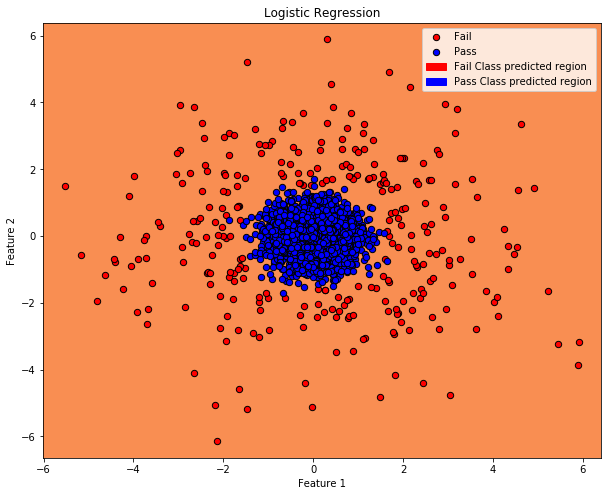

In [7]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train) 
plt.title("Logistic Regression")

Evaluate the loss and accuracy on the test dataset

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test['Class'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

672/672 [==============================] - 0s 17us/step
The loss on the test set is 0.3422 and the accuracy is 89.435%


In [9]:
# Neural network with hidden layer size = 3
np.random.seed(seed)
model = Sequential() 
model.add(Dense(3, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 
# train the model for 200 epoches and batch size 5
model.fit(X_train, y_train, batch_size=5, epochs=200, verbose=1, validation_split=0.2)

Train on 2149 samples, validate on 538 samples
Epoch 1/200
2149/2149 [==============================] - 1s 257us/step - loss: 0.5113 - accuracy: 0.8911 - val_loss: 0.4180 - val_accuracy: 0.8885
Epoch 2/200
2149/2149 [==============================] - 0s 217us/step - loss: 0.3725 - accuracy: 0.8939 - val_loss: 0.3482 - val_accuracy: 0.8885
Epoch 3/200
2149/2149 [==============================] - 0s 211us/step - loss: 0.3223 - accuracy: 0.8948 - val_loss: 0.3118 - val_accuracy: 0.8922
Epoch 4/200
2149/2149 [==============================] - 0s 217us/step - loss: 0.2916 - accuracy: 0.9037 - val_loss: 0.2862 - val_accuracy: 0.8996
Epoch 5/200
2149/2149 [==============================] - 0s 221us/step - loss: 0.2672 - accuracy: 0.9102 - val_loss: 0.2642 - val_accuracy: 0.9089
Epoch 6/200
2149/2149 [==============================] - 0s 231us/step - loss: 0.2450 - accuracy: 0.9190 - val_loss: 0.2457 - val_accuracy: 0.9201
Epoch 7/200
2149/2149 [==============================] - 0s 214us/step 

2149/2149 [==============================] - 0s 197us/step - loss: 0.0250 - accuracy: 0.9963 - val_loss: 0.0288 - val_accuracy: 0.9907
Epoch 112/200
2149/2149 [==============================] - 0s 191us/step - loss: 0.0248 - accuracy: 0.9949 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 113/200
2149/2149 [==============================] - 0s 219us/step - loss: 0.0245 - accuracy: 0.9953 - val_loss: 0.0281 - val_accuracy: 0.9907
Epoch 114/200
2149/2149 [==============================] - 0s 193us/step - loss: 0.0243 - accuracy: 0.9944 - val_loss: 0.0278 - val_accuracy: 0.9907
Epoch 115/200
2149/2149 [==============================] - 0s 202us/step - loss: 0.0241 - accuracy: 0.9953 - val_loss: 0.0274 - val_accuracy: 0.9907
Epoch 116/200
2149/2149 [==============================] - 0s 200us/step - loss: 0.0240 - accuracy: 0.9958 - val_loss: 0.0274 - val_accuracy: 0.9888
Epoch 117/200
2149/2149 [==============================] - 0s 199us/step - loss: 0.0237 - accuracy: 0.9958 - val_loss: 0

2149/2149 [==============================] - 0s 193us/step - loss: 0.0179 - accuracy: 0.9972 - val_loss: 0.0204 - val_accuracy: 0.9926
Epoch 167/200
2149/2149 [==============================] - 0s 200us/step - loss: 0.0179 - accuracy: 0.9967 - val_loss: 0.0204 - val_accuracy: 0.9926
Epoch 168/200
2149/2149 [==============================] - 0s 207us/step - loss: 0.0178 - accuracy: 0.9977 - val_loss: 0.0205 - val_accuracy: 0.9944
Epoch 169/200
2149/2149 [==============================] - 0s 202us/step - loss: 0.0178 - accuracy: 0.9977 - val_loss: 0.0203 - val_accuracy: 0.9926
Epoch 170/200
2149/2149 [==============================] - 0s 195us/step - loss: 0.0177 - accuracy: 0.9967 - val_loss: 0.0202 - val_accuracy: 0.9944
Epoch 171/200
2149/2149 [==============================] - 0s 200us/step - loss: 0.0176 - accuracy: 0.9977 - val_loss: 0.0197 - val_accuracy: 0.9926
Epoch 172/200
2149/2149 [==============================] - 0s 192us/step - loss: 0.0175 - accuracy: 0.9972 - val_loss: 0

Plot the decision boundary

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 3')

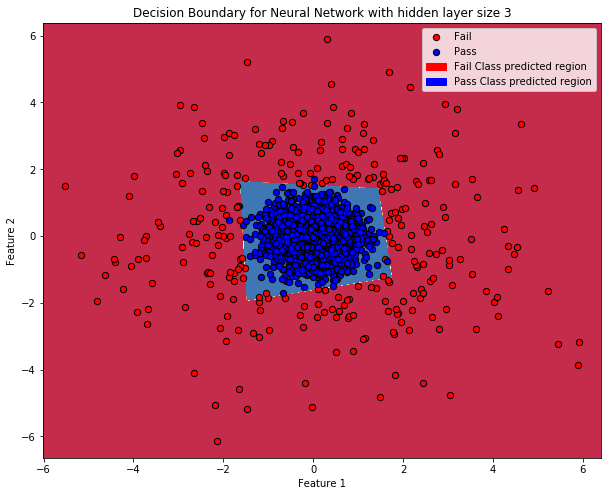

In [10]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train) 
plt.title("Decision Boundary for Neural Network with hidden layer size 3")

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test['Class'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

672/672 [==============================] - 0s 18us/step
The loss on the test set is 0.0181 and the accuracy is 99.702%


Create a neural network with hidden layer of size 6

In [12]:
np.random.seed(seed)
model = Sequential() 
model.add(Dense(6, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 
# train the model for 400 epoches
model.fit(X_train, y_train, batch_size=5, epochs=400, verbose=1, validation_split=0.2) 

Train on 2149 samples, validate on 538 samples
Epoch 1/400
2149/2149 [==============================] - 1s 255us/step - loss: 0.5571 - accuracy: 0.8939 - val_loss: 0.4449 - val_accuracy: 0.8885
Epoch 2/400
2149/2149 [==============================] - 0s 217us/step - loss: 0.3933 - accuracy: 0.8939 - val_loss: 0.3491 - val_accuracy: 0.8885
Epoch 3/400
2149/2149 [==============================] - 1s 234us/step - loss: 0.3171 - accuracy: 0.8967 - val_loss: 0.3078 - val_accuracy: 0.8941
Epoch 4/400
2149/2149 [==============================] - 1s 262us/step - loss: 0.2794 - accuracy: 0.9055 - val_loss: 0.2847 - val_accuracy: 0.9015801 - accuracy: 0.90
Epoch 5/400
2149/2149 [==============================] - 0s 228us/step - loss: 0.2558 - accuracy: 0.9125 - val_loss: 0.2636 - val_accuracy: 0.9052
Epoch 6/400
2149/2149 [==============================] - 0s 215us/step - loss: 0.2346 - accuracy: 0.9190 - val_loss: 0.2421 - val_accuracy: 0.9145
Epoch 7/400
2149/2149 [============================

Epoch 56/400
2149/2149 [==============================] - 0s 210us/step - loss: 0.0347 - accuracy: 0.9800 - val_loss: 0.0325 - val_accuracy: 0.9833
Epoch 57/400
2149/2149 [==============================] - 0s 211us/step - loss: 0.0342 - accuracy: 0.9791 - val_loss: 0.0324 - val_accuracy: 0.9833
Epoch 58/400
2149/2149 [==============================] - 0s 204us/step - loss: 0.0338 - accuracy: 0.9800 - val_loss: 0.0318 - val_accuracy: 0.9833
Epoch 59/400
2149/2149 [==============================] - 0s 210us/step - loss: 0.0334 - accuracy: 0.9805 - val_loss: 0.0314 - val_accuracy: 0.9833
Epoch 60/400
2149/2149 [==============================] - 0s 206us/step - loss: 0.0330 - accuracy: 0.9800 - val_loss: 0.0307 - val_accuracy: 0.9833
Epoch 61/400
2149/2149 [==============================] - 0s 208us/step - loss: 0.0327 - accuracy: 0.9795 - val_loss: 0.0303 - val_accuracy: 0.9833
Epoch 62/400
2149/2149 [==============================] - 0s 200us/step - loss: 0.0322 - accuracy: 0.9795 - val_

2149/2149 [==============================] - 0s 203us/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0181 - val_accuracy: 0.9944
Epoch 112/400
2149/2149 [==============================] - 0s 224us/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0180 - val_accuracy: 0.9963
Epoch 113/400
2149/2149 [==============================] - 0s 213us/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0178 - val_accuracy: 0.9944
Epoch 114/400
2149/2149 [==============================] - 0s 204us/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.0178 - val_accuracy: 0.9963
Epoch 115/400
2149/2149 [==============================] - 0s 208us/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0172 - val_accuracy: 0.9963
Epoch 116/400
2149/2149 [==============================] - 0s 206us/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0173 - val_accuracy: 0.9944
Epoch 117/400
2149/2149 [==============================] - 0s 214us/step - loss: 0.0214 - accuracy: 0.9926 - val_loss: 0

2149/2149 [==============================] - 0s 207us/step - loss: 0.0176 - accuracy: 0.9935 - val_loss: 0.0131 - val_accuracy: 0.9944
Epoch 167/400
2149/2149 [==============================] - 0s 207us/step - loss: 0.0176 - accuracy: 0.9935 - val_loss: 0.0129 - val_accuracy: 0.9963
Epoch 168/400
2149/2149 [==============================] - 0s 220us/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0130 - val_accuracy: 0.9963
Epoch 169/400
2149/2149 [==============================] - 0s 203us/step - loss: 0.0175 - accuracy: 0.9935 - val_loss: 0.0129 - val_accuracy: 0.9963
Epoch 170/400
2149/2149 [==============================] - 0s 202us/step - loss: 0.0174 - accuracy: 0.9935 - val_loss: 0.0130 - val_accuracy: 0.9963
Epoch 171/400
2149/2149 [==============================] - 0s 195us/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0128 - val_accuracy: 0.9963
Epoch 172/400
2149/2149 [==============================] - 0s 195us/step - loss: 0.0172 - accuracy: 0.9935 - val_loss: 0

2149/2149 [==============================] - 0s 201us/step - loss: 0.0156 - accuracy: 0.9940 - val_loss: 0.0109 - val_accuracy: 0.9963
Epoch 222/400
2149/2149 [==============================] - 0s 208us/step - loss: 0.0156 - accuracy: 0.9926 - val_loss: 0.0109 - val_accuracy: 0.9981
Epoch 223/400
2149/2149 [==============================] - 0s 210us/step - loss: 0.0154 - accuracy: 0.9926 - val_loss: 0.0111 - val_accuracy: 0.9944
Epoch 224/400
2149/2149 [==============================] - 0s 209us/step - loss: 0.0154 - accuracy: 0.9930 - val_loss: 0.0110 - val_accuracy: 0.9963
Epoch 225/400
2149/2149 [==============================] - 0s 200us/step - loss: 0.0155 - accuracy: 0.9930 - val_loss: 0.0107 - val_accuracy: 0.9981
Epoch 226/400
2149/2149 [==============================] - 0s 199us/step - loss: 0.0155 - accuracy: 0.9935 - val_loss: 0.0107 - val_accuracy: 0.9981
Epoch 227/400
2149/2149 [==============================] - 0s 204us/step - loss: 0.0155 - accuracy: 0.9935 - val_loss: 0

Epoch 276/400
2149/2149 [==============================] - 0s 216us/step - loss: 0.0141 - accuracy: 0.9949 - val_loss: 0.0095 - val_accuracy: 0.9981
Epoch 277/400
2149/2149 [==============================] - 0s 211us/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0094 - val_accuracy: 0.9963
Epoch 278/400
2149/2149 [==============================] - 0s 209us/step - loss: 0.0141 - accuracy: 0.9949 - val_loss: 0.0092 - val_accuracy: 0.9981
Epoch 279/400
2149/2149 [==============================] - 0s 217us/step - loss: 0.0142 - accuracy: 0.9944 - val_loss: 0.0093 - val_accuracy: 0.9981
Epoch 280/400
2149/2149 [==============================] - 0s 214us/step - loss: 0.0141 - accuracy: 0.9940 - val_loss: 0.0093 - val_accuracy: 0.9981
Epoch 281/400
2149/2149 [==============================] - 0s 211us/step - loss: 0.0142 - accuracy: 0.9949 - val_loss: 0.0093 - val_accuracy: 0.9981
Epoch 282/400
2149/2149 [==============================] - 0s 226us/step - loss: 0.0141 - accuracy: 0.9953

Epoch 331/400
2149/2149 [==============================] - 0s 209us/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 0.0085 - val_accuracy: 0.9981
Epoch 332/400
2149/2149 [==============================] - 0s 207us/step - loss: 0.0130 - accuracy: 0.9949 - val_loss: 0.0085 - val_accuracy: 0.9981
Epoch 333/400
2149/2149 [==============================] - 0s 200us/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 0.0084 - val_accuracy: 0.9981
Epoch 334/400
2149/2149 [==============================] - 0s 201us/step - loss: 0.0128 - accuracy: 0.9944 - val_loss: 0.0085 - val_accuracy: 0.9981
Epoch 335/400
2149/2149 [==============================] - 0s 210us/step - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.0084 - val_accuracy: 0.9981
Epoch 336/400
2149/2149 [==============================] - 0s 213us/step - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.0084 - val_accuracy: 0.9981
Epoch 337/400
2149/2149 [==============================] - 0s 206us/step - loss: 0.0130 - accuracy: 0.9949

Epoch 386/400
2149/2149 [==============================] - 0s 206us/step - loss: 0.0123 - accuracy: 0.9953 - val_loss: 0.0079 - val_accuracy: 0.9981
Epoch 387/400
2149/2149 [==============================] - 0s 200us/step - loss: 0.0124 - accuracy: 0.9953 - val_loss: 0.0077 - val_accuracy: 0.9981
Epoch 388/400
2149/2149 [==============================] - 0s 204us/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0079 - val_accuracy: 0.9981
Epoch 389/400
2149/2149 [==============================] - 0s 203us/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0079 - val_accuracy: 0.9981
Epoch 390/400
2149/2149 [==============================] - 0s 211us/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0079 - val_accuracy: 0.9981
Epoch 391/400
2149/2149 [==============================] - 0s 206us/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0077 - val_accuracy: 0.9981
Epoch 392/400
2149/2149 [==============================] - 0s 201us/step - loss: 0.0123 - accuracy: 0.9953

Plot the decision boundary

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 6')

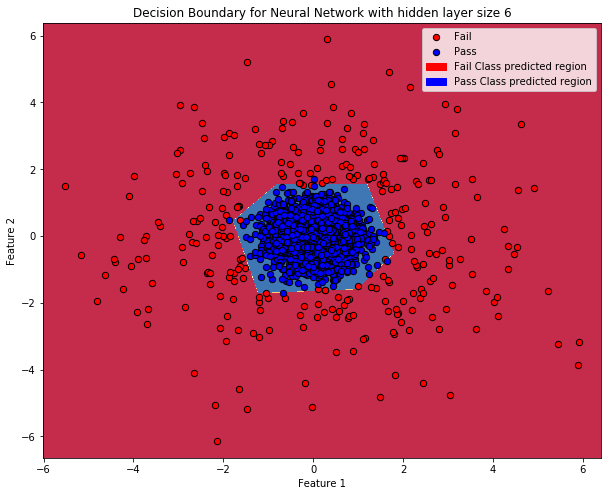

In [13]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train) 
plt.title("Decision Boundary for Neural Network with hidden layer size 6") 

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test['Class'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

672/672 [==============================] - 0s 22us/step
The loss on the test set is 0.0194 and the accuracy is 99.702%


Create a neural network with hidden layer of size 3 and tanh activation function

In [15]:
# Neural network with hidden layer size = 3 with tanh activation function
np.random.seed(seed)
model = Sequential() 
model.add(Dense(3, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 
# train the model for 200 epoches and batch size 5
model.fit(X_train, y_train, batch_size=5, epochs=200, verbose=1, validation_split=0.2) 

Train on 2149 samples, validate on 538 samples
Epoch 1/200
2149/2149 [==============================] - 1s 262us/step - loss: 0.3991 - accuracy: 0.8702 - val_loss: 0.3068 - val_accuracy: 0.8885
Epoch 2/200
2149/2149 [==============================] - 1s 241us/step - loss: 0.2718 - accuracy: 0.8939 - val_loss: 0.2776 - val_accuracy: 0.8885
Epoch 3/200
2149/2149 [==============================] - 1s 253us/step - loss: 0.2526 - accuracy: 0.8939 - val_loss: 0.2664 - val_accuracy: 0.8885
Epoch 4/200
2149/2149 [==============================] - 1s 240us/step - loss: 0.2416 - accuracy: 0.8939 - val_loss: 0.2584 - val_accuracy: 0.8885
Epoch 5/200
2149/2149 [==============================] - 0s 225us/step - loss: 0.2326 - accuracy: 0.8939 - val_loss: 0.2512 - val_accuracy: 0.8885
Epoch 6/200
2149/2149 [==============================] - 1s 247us/step - loss: 0.2245 - accuracy: 0.8939 - val_loss: 0.2447 - val_accuracy: 0.8885
Epoch 7/200
2149/2149 [==============================] - 1s 253us/step 

2149/2149 [==============================] - 0s 230us/step - loss: 0.1394 - accuracy: 0.9609 - val_loss: 0.1658 - val_accuracy: 0.9572
Epoch 57/200
2149/2149 [==============================] - 1s 255us/step - loss: 0.1387 - accuracy: 0.9604 - val_loss: 0.1645 - val_accuracy: 0.9572
Epoch 58/200
2149/2149 [==============================] - 0s 228us/step - loss: 0.1377 - accuracy: 0.9604 - val_loss: 0.1633 - val_accuracy: 0.9554
Epoch 59/200
2149/2149 [==============================] - 0s 229us/step - loss: 0.1366 - accuracy: 0.9604 - val_loss: 0.1619 - val_accuracy: 0.9554
Epoch 60/200
2149/2149 [==============================] - 1s 234us/step - loss: 0.1352 - accuracy: 0.9618 - val_loss: 0.1597 - val_accuracy: 0.9554
Epoch 61/200
2149/2149 [==============================] - 0s 213us/step - loss: 0.1334 - accuracy: 0.9604 - val_loss: 0.1572 - val_accuracy: 0.9554
Epoch 62/200
2149/2149 [==============================] - 1s 233us/step - loss: 0.1314 - accuracy: 0.9609 - val_loss: 0.1546 

2149/2149 [==============================] - 0s 199us/step - loss: 0.0579 - accuracy: 0.9916 - val_loss: 0.0595 - val_accuracy: 0.9926
Epoch 112/200
2149/2149 [==============================] - 0s 205us/step - loss: 0.0574 - accuracy: 0.9921 - val_loss: 0.0591 - val_accuracy: 0.9926
Epoch 113/200
2149/2149 [==============================] - 0s 195us/step - loss: 0.0570 - accuracy: 0.9912 - val_loss: 0.0583 - val_accuracy: 0.9926
Epoch 114/200
2149/2149 [==============================] - 0s 209us/step - loss: 0.0565 - accuracy: 0.9907 - val_loss: 0.0577 - val_accuracy: 0.9926
Epoch 115/200
2149/2149 [==============================] - 0s 201us/step - loss: 0.0560 - accuracy: 0.9907 - val_loss: 0.0571 - val_accuracy: 0.9926
Epoch 116/200
2149/2149 [==============================] - 0s 203us/step - loss: 0.0556 - accuracy: 0.9926 - val_loss: 0.0568 - val_accuracy: 0.9926
Epoch 117/200
2149/2149 [==============================] - 0s 205us/step - loss: 0.0551 - accuracy: 0.9930 - val_loss: 0

2149/2149 [==============================] - 0s 197us/step - loss: 0.0428 - accuracy: 0.9916 - val_loss: 0.0434 - val_accuracy: 0.9907
Epoch 167/200
2149/2149 [==============================] - 0s 197us/step - loss: 0.0426 - accuracy: 0.9912 - val_loss: 0.0433 - val_accuracy: 0.9907
Epoch 168/200
2149/2149 [==============================] - 0s 192us/step - loss: 0.0424 - accuracy: 0.9912 - val_loss: 0.0432 - val_accuracy: 0.9907
Epoch 169/200
2149/2149 [==============================] - 0s 208us/step - loss: 0.0423 - accuracy: 0.9921 - val_loss: 0.0431 - val_accuracy: 0.9907
Epoch 170/200
2149/2149 [==============================] - 0s 197us/step - loss: 0.0422 - accuracy: 0.9916 - val_loss: 0.0430 - val_accuracy: 0.9907
Epoch 171/200
2149/2149 [==============================] - 0s 198us/step - loss: 0.0420 - accuracy: 0.9921 - val_loss: 0.0429 - val_accuracy: 0.9907
Epoch 172/200
2149/2149 [==============================] - 0s 198us/step - loss: 0.0419 - accuracy: 0.9912 - val_loss: 0

Plotting the decision boundary on the trainingdataset

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 3')

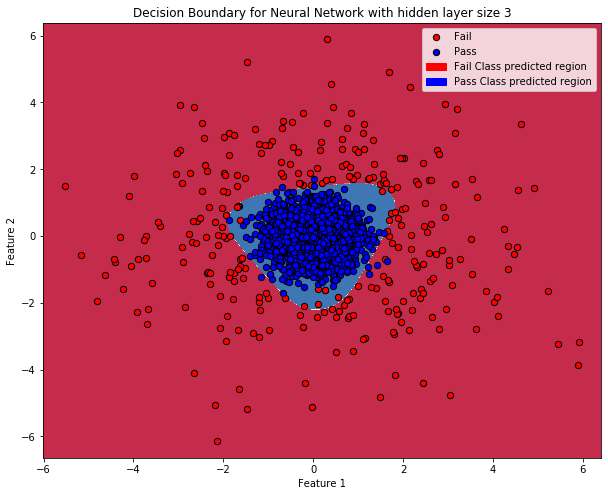

In [16]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train) 
plt.title("Decision Boundary for Neural Network with hidden layer size 3")

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test['Class'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

672/672 [==============================] - 0s 20us/step
The loss on the test set is 0.0153 and the accuracy is 99.702%


Neural network with hidden layer size = 6 with tanh activation function

In [17]:
np.random.seed(seed)
model = Sequential() 
model.add(Dense(6, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 
# train the model for 400 epoches
model.fit(X_train, y_train, batch_size=5, epochs=400, verbose=1, validation_split=0.2) 

Train on 2149 samples, validate on 538 samples
Epoch 1/400
2149/2149 [==============================] - 1s 254us/step - loss: 0.4192 - accuracy: 0.8725 - val_loss: 0.3111 - val_accuracy: 0.8885
Epoch 2/400
2149/2149 [==============================] - 1s 256us/step - loss: 0.2830 - accuracy: 0.8939 - val_loss: 0.2763 - val_accuracy: 0.8885
Epoch 3/400
2149/2149 [==============================] - 0s 219us/step - loss: 0.2624 - accuracy: 0.8939 - val_loss: 0.2654 - val_accuracy: 0.8885
Epoch 4/400
2149/2149 [==============================] - 1s 247us/step - loss: 0.2520 - accuracy: 0.8939 - val_loss: 0.2576 - val_accuracy: 0.8885
Epoch 5/400
2149/2149 [==============================] - 0s 220us/step - loss: 0.2438 - accuracy: 0.8939 - val_loss: 0.2495 - val_accuracy: 0.8885
Epoch 6/400
2149/2149 [==============================] - 1s 238us/step - loss: 0.2361 - accuracy: 0.8939 - val_loss: 0.2421 - val_accuracy: 0.8885
Epoch 7/400
2149/2149 [==============================] - 0s 217us/step 

2149/2149 [==============================] - 0s 202us/step - loss: 0.0456 - accuracy: 0.9921 - val_loss: 0.0442 - val_accuracy: 0.9944
Epoch 112/400
2149/2149 [==============================] - 0s 198us/step - loss: 0.0453 - accuracy: 0.9921 - val_loss: 0.0440 - val_accuracy: 0.9944
Epoch 113/400
2149/2149 [==============================] - 0s 202us/step - loss: 0.0451 - accuracy: 0.9926 - val_loss: 0.0436 - val_accuracy: 0.9944
Epoch 114/400
2149/2149 [==============================] - 0s 203us/step - loss: 0.0448 - accuracy: 0.9912 - val_loss: 0.0435 - val_accuracy: 0.9944
Epoch 115/400
2149/2149 [==============================] - 0s 204us/step - loss: 0.0446 - accuracy: 0.9926 - val_loss: 0.0432 - val_accuracy: 0.9944
Epoch 116/400
2149/2149 [==============================] - 0s 230us/step - loss: 0.0443 - accuracy: 0.9921 - val_loss: 0.0429 - val_accuracy: 0.9944
Epoch 117/400
2149/2149 [==============================] - 0s 232us/step - loss: 0.0441 - accuracy: 0.9921 - val_loss: 0

2149/2149 [==============================] - 1s 340us/step - loss: 0.0357 - accuracy: 0.9926 - val_loss: 0.0334 - val_accuracy: 0.9963
Epoch 167/400
2149/2149 [==============================] - 1s 288us/step - loss: 0.0356 - accuracy: 0.9926 - val_loss: 0.0333 - val_accuracy: 0.9963
Epoch 168/400
2149/2149 [==============================] - 1s 271us/step - loss: 0.0355 - accuracy: 0.9926 - val_loss: 0.0332 - val_accuracy: 0.9963
Epoch 169/400
2149/2149 [==============================] - 0s 217us/step - loss: 0.0354 - accuracy: 0.9921 - val_loss: 0.0331 - val_accuracy: 0.9963
Epoch 170/400
2149/2149 [==============================] - 0s 189us/step - loss: 0.0352 - accuracy: 0.9916 - val_loss: 0.0330 - val_accuracy: 0.9963
Epoch 171/400
2149/2149 [==============================] - 0s 184us/step - loss: 0.0351 - accuracy: 0.9926 - val_loss: 0.0327 - val_accuracy: 0.9963
Epoch 172/400
2149/2149 [==============================] - 0s 218us/step - loss: 0.0350 - accuracy: 0.9921 - val_loss: 0

Epoch 221/400
2149/2149 [==============================] - 0s 193us/step - loss: 0.0304 - accuracy: 0.9940 - val_loss: 0.0279 - val_accuracy: 0.9963
Epoch 222/400
2149/2149 [==============================] - 0s 202us/step - loss: 0.0304 - accuracy: 0.9930 - val_loss: 0.0278 - val_accuracy: 0.9963
Epoch 223/400
2149/2149 [==============================] - 0s 202us/step - loss: 0.0303 - accuracy: 0.9935 - val_loss: 0.0277 - val_accuracy: 0.9963
Epoch 224/400
2149/2149 [==============================] - 0s 206us/step - loss: 0.0302 - accuracy: 0.9930 - val_loss: 0.0277 - val_accuracy: 0.9963
Epoch 225/400
2149/2149 [==============================] - 0s 196us/step - loss: 0.0301 - accuracy: 0.9935 - val_loss: 0.0276 - val_accuracy: 0.9963
Epoch 226/400
2149/2149 [==============================] - 0s 200us/step - loss: 0.0301 - accuracy: 0.9935 - val_loss: 0.0274 - val_accuracy: 0.9963
Epoch 227/400
2149/2149 [==============================] - 0s 219us/step - loss: 0.0300 - accuracy: 0.9935

Epoch 276/400
2149/2149 [==============================] - 0s 184us/step - loss: 0.0269 - accuracy: 0.9940 - val_loss: 0.0244 - val_accuracy: 0.9963
Epoch 277/400
2149/2149 [==============================] - 0s 192us/step - loss: 0.0269 - accuracy: 0.9935 - val_loss: 0.0242 - val_accuracy: 0.9963
Epoch 278/400
2149/2149 [==============================] - 0s 183us/step - loss: 0.0268 - accuracy: 0.9940 - val_loss: 0.0242 - val_accuracy: 0.9963
Epoch 279/400
2149/2149 [==============================] - 0s 185us/step - loss: 0.0268 - accuracy: 0.9944 - val_loss: 0.0242 - val_accuracy: 0.9963
Epoch 280/400
2149/2149 [==============================] - 0s 192us/step - loss: 0.0267 - accuracy: 0.9940 - val_loss: 0.0242 - val_accuracy: 0.9963
Epoch 281/400
2149/2149 [==============================] - 0s 185us/step - loss: 0.0267 - accuracy: 0.9940 - val_loss: 0.0242 - val_accuracy: 0.9963
Epoch 282/400
2149/2149 [==============================] - 0s 205us/step - loss: 0.0266 - accuracy: 0.9940

Epoch 331/400
2149/2149 [==============================] - 0s 190us/step - loss: 0.0245 - accuracy: 0.9944 - val_loss: 0.0221 - val_accuracy: 0.9944
Epoch 332/400
2149/2149 [==============================] - 0s 213us/step - loss: 0.0244 - accuracy: 0.9949 - val_loss: 0.0221 - val_accuracy: 0.9944
Epoch 333/400
2149/2149 [==============================] - 0s 210us/step - loss: 0.0244 - accuracy: 0.9958 - val_loss: 0.0220 - val_accuracy: 0.9944
Epoch 334/400
2149/2149 [==============================] - 0s 225us/step - loss: 0.0243 - accuracy: 0.9944 - val_loss: 0.0220 - val_accuracy: 0.9963
Epoch 335/400
2149/2149 [==============================] - 0s 202us/step - loss: 0.0243 - accuracy: 0.9944 - val_loss: 0.0221 - val_accuracy: 0.9963
Epoch 336/400
2149/2149 [==============================] - 0s 213us/step - loss: 0.0243 - accuracy: 0.9949 - val_loss: 0.0220 - val_accuracy: 0.9944
Epoch 337/400
2149/2149 [==============================] - 0s 189us/step - loss: 0.0242 - accuracy: 0.9958

Epoch 386/400
2149/2149 [==============================] - 0s 181us/step - loss: 0.0227 - accuracy: 0.9958 - val_loss: 0.0204 - val_accuracy: 0.9944
Epoch 387/400
2149/2149 [==============================] - 0s 185us/step - loss: 0.0226 - accuracy: 0.9958 - val_loss: 0.0203 - val_accuracy: 0.9944
Epoch 388/400
2149/2149 [==============================] - 0s 181us/step - loss: 0.0226 - accuracy: 0.9953 - val_loss: 0.0204 - val_accuracy: 0.9944
Epoch 389/400
2149/2149 [==============================] - 0s 178us/step - loss: 0.0226 - accuracy: 0.9953 - val_loss: 0.0203 - val_accuracy: 0.9944
Epoch 390/400
2149/2149 [==============================] - 0s 185us/step - loss: 0.0225 - accuracy: 0.9949 - val_loss: 0.0202 - val_accuracy: 0.9963
Epoch 391/400
2149/2149 [==============================] - 0s 183us/step - loss: 0.0225 - accuracy: 0.9953 - val_loss: 0.0201 - val_accuracy: 0.9963
Epoch 392/400
2149/2149 [==============================] - 0s 207us/step - loss: 0.0225 - accuracy: 0.9953

Plot the decision boundary

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 6')

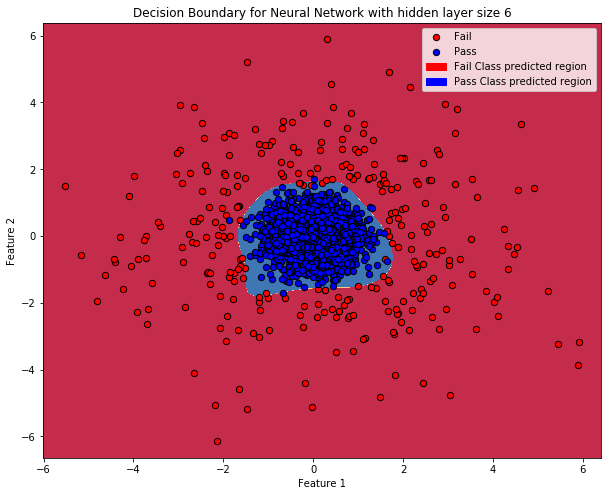

In [18]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train) 
plt.title("Decision Boundary for Neural Network with hidden layer size 6") 

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test['Class'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

672/672 [==============================] - 0s 18us/step
The loss on the test set is 0.0208 and the accuracy is 99.554%
